### Import required packages

In [1]:
import scanpy.api as sc   #version 1.2.2
import numpy as np   #version 1.14.3
import pandas as pd   #version 0.23.0
import scipy.stats   #version 1.1.0
import matplotlib.pyplot as plt  #version 2.2.2

#Python version 3.6.5 & Jupyter version 1.0.0

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

In [3]:
def saveData_v1(dataset, path, id_, name):
    
    """
    Saves pd.DataFrames or pd.Series to csv.
    ----------
    dataset: [pd.DataFrame] or [pd.Series].
    path: path to saving location.
    id_: experimental ID (e.g. YYMMDD).
    name: name of saved file. Format: /path/ID_name.
    """
            
    dataset.to_csv('%s/%s_%s.txt' % (path, id_, name), sep = '\t')

### Import data (expression table & meta-data table)

In [4]:
#Load expression table
expression_table_fb_dc = pd.read_csv("/Users/tija/Documents/RendlCollaboration/Final/Required-Input/DC-FB_Input_Expression-Table.txt",sep='\t',index_col=0)
expression_table_fb_dc.shape    #20370 genes, 1823 cells (1371 Fb, 149 DC0, 152 DC1, 151 DC2)

(20370, 1823)

In [5]:
#Load Meta-data table
meta_data_fb_dc = pd.read_csv("/Users/tija/Documents/RendlCollaboration/Final/Required-Input/DC-FB_Input_Meta-Data-Table.txt",sep='\t',index_col=0,usecols=[1,2,3,4])
meta_data_fb_dc.shape    #1823 cells, 3 annotation categories

(1823, 3)

In [6]:
meta_data_fb_dc[1:10]    #Meta-data table (only first 10 cells displayed)

,cell_type,sorting_information,original_plate
well_id,,,
KM01_05,Fb,unsorted,1
KM01_06,Fb,unsorted,1
KM01_07,Fb,unsorted,1
KM01_08,Fb,unsorted,1
KM01_11,Fb,unsorted,1
KM01_14,DC1,unsorted,1
KM01_16,Fb,unsorted,1
KM01_17,Fb,unsorted,1
KM01_18,Fb,unsorted,1


In [7]:
#Remove mitochondrial genes (based on "_chrM" in gene name) - 37 of them
mtgenes = [x for ix, x in enumerate(expression_table_fb_dc.index.tolist()) if '_chrM' in x]
expression_table_fb_dc.loc[mtgenes]

,KM01_02,KM01_05,KM01_06,KM01_07,KM01_08,KM01_11,KM01_14,KM01_16,KM01_17,KM01_18,...,KM09_113,KM09_114,KM09_115,KM09_116,KM09_117,KM09_118,KM09_119,KM09_120,KM09_121,KM09_122
mt-Rnr1__chrM,43.22,33.13,51.31,0,2.00,0.0,8.01,57.39,349.45,4.00,...,3.00,4.00,52.33,67.55,27.09,25.07,33.13,18.04,48.28,12.02
mt-Rnr2__chrM,251.54,234.56,663.95,1,31.11,3.0,127.96,721.98,1981.28,14.02,...,13.02,65.51,312.60,284.63,268.59,89.97,275.00,152.80,468.78,140.36
mt-Ta__chrM,0.00,0.00,0.00,0,0.00,0.0,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
mt-Tc__chrM,0.00,0.00,0.00,0,0.00,0.0,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
mt-Td__chrM,0.00,0.00,1.00,0,0.00,0.0,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
mt-Te__chrM,0.00,0.00,0.00,0,0.00,0.0,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
mt-Tf__chrM,0.00,0.00,0.00,0,0.00,0.0,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
mt-Tg__chrM,0.00,0.00,0.00,0,0.00,0.0,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
mt-Th__chrM,0.00,0.00,0.00,0,0.00,0.0,0.00,0.00,0.00,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
mt-Ti__chrM,0.00,0.00,0.00,0,1.00,0.0,0.00,0.00,2.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [8]:
expression_table_fb_dc_noMt = expression_table_fb_dc.loc[(set(expression_table_fb_dc.index)-set(mtgenes))]
expression_table_fb_dc_noMt.shape       #20333 genes (rows), 1823 cells (columns)

(20333, 1823)

In [9]:
#Remove ERCC spike-in RNAs (based on "ERCC" in gene name) - 86 of them
ERCCgenes = [x for ix, x in enumerate(expression_table_fb_dc.index.tolist()) if 'ERCC' in x]
expression_table_fb_dc.loc[ERCCgenes]

,KM01_02,KM01_05,KM01_06,KM01_07,KM01_08,KM01_11,KM01_14,KM01_16,KM01_17,KM01_18,...,KM09_113,KM09_114,KM09_115,KM09_116,KM09_117,KM09_118,KM09_119,KM09_120,KM09_121,KM09_122
ERCC-00002,51.31,124.87,168.39,0,69.58,200.82,74.67,88.95,163.19,185.10,...,56.38,58.41,38.17,53.34,50.30,20.05,34.14,29.10,30.11,34.14
ERCC-00003,12.02,8.01,17.03,0,6.00,13.02,9.01,4.00,10.01,8.01,...,4.00,8.01,5.00,5.00,6.00,2.00,4.00,0.00,2.00,2.00
ERCC-00004,45.24,40.19,52.33,1,28.09,60.44,42.21,41.20,64.50,55.37,...,34.14,39.18,26.08,32.12,26.08,11.01,23.06,5.00,4.00,14.02
ERCC-00009,2.00,6.00,2.00,0,2.00,9.01,4.00,6.00,7.01,14.02,...,2.00,6.00,4.00,5.00,0.00,6.00,2.00,2.00,1.00,1.00
ERCC-00012,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ERCC-00013,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ERCC-00014,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ERCC-00016,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ERCC-00017,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ERCC-00019,0.00,0.00,0.00,0,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [10]:
expression_table_fb_dc_noMtnoERCC = expression_table_fb_dc_noMt.loc[(set(expression_table_fb_dc_noMt.index)-set(ERCCgenes))]
expression_table_fb_dc_noMtnoERCC.shape      #20247 genes (rows), 1823 cells (columns)

(20247, 1823)

In [11]:
#Determine transcripts/cell
colsums = [expression_table_fb_dc_noMtnoERCC[x].sum() for x in list(expression_table_fb_dc_noMtnoERCC)]
len(colsums)

1823

In [12]:
#Add transcripts/cell to meta-data table
meta_data_fb_dc['umis_per_cell']=colsums
meta_data_fb_dc[0:5]

,cell_type,sorting_information,original_plate,umis_per_cell
well_id,,,,
KM01_02,Fb,unsorted,1,22954.90
KM01_05,Fb,unsorted,1,31514.88
KM01_06,Fb,unsorted,1,90628.79
KM01_07,Fb,unsorted,1,156.00
KM01_08,Fb,unsorted,1,4876.63


In [13]:
#Restrict meta data table to cells with >6000 UMI/cell (after removing mt and ERCC genes)
meta_data_fb_dc=meta_data_fb_dc[meta_data_fb_dc['umis_per_cell']>=6000]
meta_data_fb_dc.shape   # 1383 cells (rows)

(1383, 4)

In [14]:
#Get list of cell IDs for cells with >6000 UMI/cell
meta_data_fb_dc.index

Index(['KM01_02', 'KM01_05', 'KM01_06', 'KM01_14', 'KM01_16', 'KM01_17',
       'KM01_19', 'KM01_24', 'KM01_27', 'KM01_32',
       ...
       'KM09_111', 'KM09_112', 'KM09_114', 'KM09_115', 'KM09_116', 'KM09_117',
       'KM09_119', 'KM09_120', 'KM09_121', 'KM09_122'],
      dtype='object', name='well_id', length=1383)

In [15]:
len(meta_data_fb_dc.index), len(list(expression_table_fb_dc_noMtnoERCC))   #1383 cells out of 1823 total cells have >6000 UMI/cell

(1383, 1823)

In [16]:
len(intersection(meta_data_fb_dc.index,list(expression_table_fb_dc_noMtnoERCC)))  #Double check that all those cells with >6000 UMI/cell are actually in expression table

1383

In [17]:
#Restrict expression table to cells with >6000 UMI/cell (after removing mt and ERCC genes)
expression_table_fb_dc_noMtnoERCC_above6000 = expression_table_fb_dc_noMtnoERCC.loc[:,intersection(meta_data_fb_dc.index,list(expression_table_fb_dc_noMtnoERCC))]
expression_table_fb_dc_noMtnoERCC_above6000[0:5]

,KM01_02,KM01_05,KM01_06,KM01_14,KM01_16,KM01_17,KM01_19,KM01_24,KM01_27,KM01_32,...,KM09_111,KM09_112,KM09_114,KM09_115,KM09_116,KM09_117,KM09_119,KM09_120,KM09_121,KM09_122
Syngr2__chr11,1.0,0.0,3.00,0.0,4.0,1.00,0.0,0.0,0.00,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,1.0
Mcm7__chr5,3.0,2.0,24.07,1.0,0.0,12.02,4.0,0.0,8.01,16.03,...,0.0,4.0,0.0,1.0,6.0,0.0,11.01,1.0,11.01,1.0
Aym1__chr5,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0
Prodh__chr16,0.0,0.0,0.00,0.0,1.0,0.00,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0
Nr6a1__chr2,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0


In [18]:
expression_table_fb_dc_noMtnoERCC_above6000.shape    #20247 genes, 1383 cells

(20247, 1383)

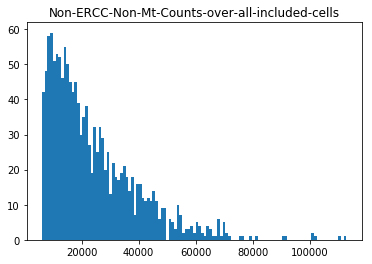

In [19]:
#View histogram of all included cells (non-ERCC-non-mt-counts)
plt.hist(meta_data_fb_dc['umis_per_cell'], bins=113) 
plt.title("Non-ERCC-Non-Mt-Counts-over-all-included-cells")
plt.show()

In [20]:
#Load and add the raceID3 clustering data from Rendl Lab 
raceID3_dc_fb = pd.read_excel("/Users/tija/Documents/RendlCollaboration/Final/Required-Input/cell_clust_raceID3.xlsx", sheet_name=0, header=0, names=['well_id','cluster_raceID3'], index_col=None)
raceID3_dc_fb.shape

(1383, 2)

In [21]:
#Display well names from cell_clust_raceID2.xlsx
raceID3_dc_fb['well_id'].values.tolist()[1:10]

['Live_Fb_KM01_05',
 'Live_Fb_KM01_16',
 'Live_Fb_KM01_19',
 'Live_Fb_KM01_34',
 'Live_Fb_KM01_39',
 'Live_Fb_KM01_48',
 'Live_Fb_KM01_73',
 'Live_Fb_KM01_75',
 'Live_Fb_KM01_80']

In [22]:
#Adjust well names so they match the other well names
raceID3_wellnames=[x.split('_')[2]+'_'+x.split('_')[3] for x in raceID3_dc_fb['well_id'].values.tolist()]
len(raceID3_wellnames)

1383

In [23]:
raceID3_dc_fb['well_id'] = raceID3_wellnames
raceID3_dc_fb[0:5]

,well_id,cluster_raceID3
0,KM01_02,1
1,KM01_05,1
2,KM01_16,1
3,KM01_19,1
4,KM01_34,1


In [24]:
len(raceID3_dc_fb['well_id'].values.tolist()), len(meta_data_fb_dc.index) #1383 cells in meta-data table and 1383 cells in rae

(1383, 1383)

In [25]:
meta_data_fb_dc.index

Index(['KM01_02', 'KM01_05', 'KM01_06', 'KM01_14', 'KM01_16', 'KM01_17',
       'KM01_19', 'KM01_24', 'KM01_27', 'KM01_32',
       ...
       'KM09_111', 'KM09_112', 'KM09_114', 'KM09_115', 'KM09_116', 'KM09_117',
       'KM09_119', 'KM09_120', 'KM09_121', 'KM09_122'],
      dtype='object', name='well_id', length=1383)

In [26]:
#double check that it's the same cells that are in the meta-data table and the raceID3 list
len(intersection(raceID3_dc_fb['well_id'].values.tolist(), meta_data_fb_dc.index)) 

1383

In [27]:
#Add raceID3 clustering information to meta data dataframe
meta_data_fb_dc = pd.merge(meta_data_fb_dc, raceID3_dc_fb, on='well_id')
meta_data_fb_dc[0:5]

,well_id,cell_type,sorting_information,original_plate,umis_per_cell,cluster_raceID3
0,KM01_02,Fb,unsorted,1,22954.90,1
1,KM01_05,Fb,unsorted,1,31514.88,1
2,KM01_06,Fb,unsorted,1,90628.79,2
3,KM01_14,DC1,unsorted,1,12038.07,3
4,KM01_16,Fb,unsorted,1,60681.25,1


In [28]:
meta_data_fb_dc.shape

(1383, 6)

In [29]:
meta_data_fb_dc.index=meta_data_fb_dc['well_id']
meta_data_fb_dc=meta_data_fb_dc.drop('well_id', 1)
meta_data_fb_dc[0:5]

,cell_type,sorting_information,original_plate,umis_per_cell,cluster_raceID3
well_id,,,,,
KM01_02,Fb,unsorted,1,22954.90,1
KM01_05,Fb,unsorted,1,31514.88,1
KM01_06,Fb,unsorted,1,90628.79,2
KM01_14,DC1,unsorted,1,12038.07,3
KM01_16,Fb,unsorted,1,60681.25,1


In [30]:
meta_data_fb_dc.shape

(1383, 5)

In [31]:
#Export data for further analysis
saveData_v1(meta_data_fb_dc,'/Users/tija/Documents/RendlCollaboration/Final','180828','DC-FB_Preprocessed_Metadata')
saveData_v1(expression_table_fb_dc_noMtnoERCC_above6000,'/Users/tija/Documents/RendlCollaboration/Final','180828','DC-FB_Preprocessed_Expression-Table')

### Generate AnnData Object (needed for Scanpy package)

In [32]:
adata=sc.read('/Users/tija/Documents/RendlCollaboration/Final/180828_DC-FB_Preprocessed_Expression-Table.txt')

In [33]:
adata=adata.T    #Transpose so cells become rows and genes become columns

In [34]:
adata

AnnData object with n_obs × n_vars = 1383 × 20247 

In [35]:
adata.X   #Expression data

array([[ 1.  ,  3.  ,  0.  , ...,  2.  ,  0.  ,  7.01],
       [ 0.  ,  2.  ,  0.  , ..., 10.01,  0.  ,  0.  ],
       [ 3.  , 24.07,  0.  , ..., 59.42,  1.  ,  0.  ],
       ...,
       [ 0.  ,  1.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  , 11.01,  0.  , ...,  0.  ,  0.  ,  3.  ],
       [ 1.  ,  1.  ,  0.  , ...,  1.  ,  0.  ,  0.  ]], dtype=float32)

In [36]:
adata.obs = meta_data_fb_dc   #Assign meta-data to AnnData object

In [37]:
adata.X.shape    #1383 cells (rows), 20247 genes (columns)

(1383, 20247)

In [38]:
adata.obs_names   #To access names of observations (cells)

Index(['KM01_02', 'KM01_05', 'KM01_06', 'KM01_14', 'KM01_16', 'KM01_17',
       'KM01_19', 'KM01_24', 'KM01_27', 'KM01_32',
       ...
       'KM09_111', 'KM09_112', 'KM09_114', 'KM09_115', 'KM09_116', 'KM09_117',
       'KM09_119', 'KM09_120', 'KM09_121', 'KM09_122'],
      dtype='object', name='well_id', length=1383)

In [39]:
adata.var_names   #To access names of variables (genes)

Index(['Syngr2__chr11', 'Mcm7__chr5', 'Aym1__chr5', 'Prodh__chr16',
       'Nr6a1__chr2', 'Smurf2__chr11', 'Gm10248__chr14', 'Solh__chr17',
       'Synpr__chr14', '5430425J12Rik__chr13',
       ...
       'Smad4__chr18', 'Wdr6__chr9', 'Gsn__chr2', 'Selenbp1__chr3',
       'Akr1c13__chr13', 'Vmn2r98__chr17', 'Gm6568__chrX', 'Srm__chr4',
       'Sspn__chr6', 'Shcbp1__chr8'],
      dtype='object', length=20247)

In [40]:
adata.var[0:10]   #Gives gene names

""
Syngr2__chr11
Mcm7__chr5
Aym1__chr5
Prodh__chr16
Nr6a1__chr2
Smurf2__chr11
Gm10248__chr14
Solh__chr17
Synpr__chr14
5430425J12Rik__chr13


In [41]:
adata.obs[0:10]   #Meta-data table (only first 10 cells are displayed)

,cell_type,sorting_information,original_plate,umis_per_cell,cluster_raceID3
well_id,,,,,
KM01_02,Fb,unsorted,1,22954.90,1
KM01_05,Fb,unsorted,1,31514.88,1
KM01_06,Fb,unsorted,1,90628.79,2
KM01_14,DC1,unsorted,1,12038.07,3
KM01_16,Fb,unsorted,1,60681.25,1
KM01_17,Fb,unsorted,1,51475.90,2
KM01_19,Fb,unsorted,1,34209.46,1
KM01_24,Fb,unsorted,1,13725.97,4
KM01_27,Fb,unsorted,1,12979.43,4


### Filter cells & genes

In [42]:
adata.n_obs  #Number of observations (cells)

1383

In [43]:
adata.n_vars  #Number of genes

20247

In [44]:
sc.pp.filter_cells(adata, min_genes=1) #Remove cells that don't express anything
adata.n_obs  #Still gives 1383 so all cells express at least 1 gene

1383

In [45]:
adata.obs['n_genes'].min()  #To identify how many genes lowest-expressing cell expresses

2229

In [46]:
sc.pp.filter_genes(adata,min_cells=1) #Remove genes that are not expressed in any cell

In [47]:
adata.n_vars #Shows number of genes (1764 genes were excluded because not expressed anywhere)

18483

### Find highly variable genes

In [48]:
#Identify highly variable genes
sc.pp.filter_genes_dispersion(adata, flavor='seurat', min_disp=None, max_disp=None, min_mean=None, max_mean=None, n_bins=20, n_top_genes=None, log=True, copy=False) 

In [49]:
adata.var[0:10]   #Resulting values (only first 10 genes are shown)

,n_cells,means,dispersions,dispersions_norm
Mcm7__chr5,1040,1.500383,1.759074,1.049531
Synpr__chr14,42,0.046619,0.729956,1.005409
Gria1__chr11,66,0.094482,1.504609,3.015862
Chrm2__chr6,42,0.041082,0.654911,0.810644
Ifi202b__chr1,24,0.025697,0.836803,1.282706
Csrp2__chr10,934,1.132316,1.268359,0.519293
Fam181b__chr7,308,0.351802,1.111945,1.186223
Efnb1__chrX,795,0.877404,1.181827,0.995340
Itm2a__chrX,1066,2.656525,4.157916,3.314208
Gas7__chr11,804,0.968303,1.495028,1.089507


In [50]:
adata.n_vars   #Number of variable genes

3133

### Log normalize the data

In [51]:
adata.X    #Data before normalization

array([[ 3.  ,  0.  ,  0.  , ...,  2.  ,  0.  ,  7.01],
       [ 2.  ,  0.  ,  0.  , ..., 10.01,  0.  ,  0.  ],
       [24.07,  0.  ,  1.  , ..., 59.42,  1.  ,  0.  ],
       ...,
       [ 1.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [11.01,  0.  ,  0.  , ...,  0.  ,  0.  ,  3.  ],
       [ 1.  ,  0.  ,  0.  , ...,  1.  ,  0.  ,  0.  ]], dtype=float32)

In [52]:
sc.pp.log1p(adata, copy=False, chunked=False, chunk_size=None)

In [53]:
adata.X    #Data after normalization

array([[1.3862944, 0.       , 0.       , ..., 1.0986123, 0.       ,
        2.0806909],
       [1.0986123, 0.       , 0.       , ..., 2.398804 , 0.       ,
        0.       ],
       [3.2216718, 0.       , 0.6931472, ..., 4.1013203, 0.6931472,
        0.       ],
       ...,
       [0.6931472, 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [2.4857397, 0.       , 0.       , ..., 0.       , 0.       ,
        1.3862944],
       [0.6931472, 0.       , 0.       , ..., 0.6931472, 0.       ,
        0.       ]], dtype=float32)

### Calculate Principal Components

In [54]:
sc.pp.pca(adata, n_comps=None, zero_center=True, svd_solver='auto', random_state=0, return_info=True, dtype='float32', copy=False, chunked=False, chunk_size=None)

In [55]:
adata.uns["pca"]   #Ratio of explained variance

{'variance': array([179.02098  ,  68.37996  ,  46.423134 ,  27.48797  ,  15.265277 ,
         12.411628 ,  12.007746 ,   6.564721 ,   6.0393443,   4.714764 ,
          4.419529 ,   4.2431197,   3.8569117,   3.6105735,   2.9019725,
          2.9002826,   2.7657726,   2.6407514,   2.4077253,   2.3986855,
          2.2460246,   2.1573539,   2.0983489,   2.028997 ,   1.922592 ,
          1.8430854,   1.789954 ,   1.7089524,   1.6465181,   1.6090622,
          1.5529734,   1.5314568,   1.4918692,   1.4733922,   1.453405 ,
          1.4296577,   1.4003216,   1.3926332,   1.3546648,   1.3371269,
          1.3133192,   1.3094041,   1.2570404,   1.2352431,   1.2269883,
          1.2179711,   1.1960739,   1.1858985,   1.1639483,   1.1522729],
       dtype=float32),
 'variance_ratio': array([0.21201254, 0.08098162, 0.0549784 , 0.0325537 , 0.0180785 ,
        0.01469895, 0.01422064, 0.00777453, 0.00715233, 0.00558364,
        0.005234  , 0.00502508, 0.0045677 , 0.00427596, 0.00343677,
        0.00

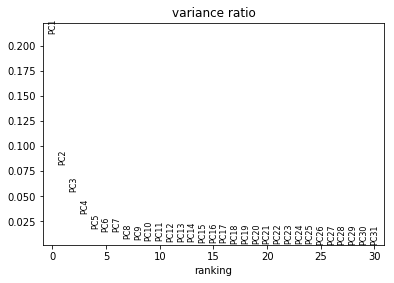

In [56]:
sc.pl.pca_variance_ratio(adata)      #Ratio of explained variance

In [57]:
adata.obsm.X_pca    #PCA representation of data

array([[  0.16566455,   9.412802  ,  -3.0351777 , ...,   0.09419379,
          1.0027341 ,  -0.1844063 ],
       [  6.2986174 ,  -4.876302  ,  -0.15040696, ...,   0.9435555 ,
          2.078251  ,  -0.17251351],
       [ 38.241856  , -11.098216  ,   3.7498066 , ...,  -2.6013422 ,
         -0.482322  ,   2.6399407 ],
       ...,
       [-17.926609  ,  -2.9009204 ,   2.3083167 , ...,   0.39280626,
          0.21357696,   0.8798115 ],
       [ -3.4372213 ,   8.380972  ,   9.101123  , ...,  -0.7184824 ,
         -0.4847937 ,  -0.14287998],
       [-12.216038  ,  -2.6089988 ,   5.828503  , ...,   0.20056407,
          0.07850731,   0.77817595]], dtype=float32)

In [58]:
adata.varm.PCs    #The principal components containing the loadings (= the weight by which each standardized original variable should be multiplied to get the component score)

array([[ 0.03386963,  0.02235896,  0.01434177, ...,  0.01544418,
        -0.00668297, -0.00663191],
       [ 0.00233293, -0.00036391,  0.0004706 , ...,  0.01319936,
        -0.00150823, -0.01216094],
       [ 0.00357594, -0.00747302,  0.00144046, ...,  0.0048414 ,
         0.01888881, -0.00218044],
       ...,
       [ 0.05214461, -0.01694922, -0.02676864, ..., -0.07676689,
         0.04852006, -0.03173271],
       [ 0.01178073, -0.00517896,  0.0079796 , ...,  0.02387672,
        -0.01735012,  0.0063478 ],
       [ 0.03093085,  0.05278107, -0.00777646, ...,  0.00672575,
         0.01027329, -0.01779443]], dtype=float32)

In [59]:
pc_df = adata.varm.to_df()
pc_df

,PCs1,PCs2,PCs3,PCs4,PCs5,PCs6,PCs7,PCs8,PCs9,PCs10,...,PCs41,PCs42,PCs43,PCs44,PCs45,PCs46,PCs47,PCs48,PCs49,PCs50
0,0.033870,0.022359,0.014342,-0.043007,-0.097618,-0.024956,0.019782,0.024571,1.851775e-02,-0.018000,...,-0.021943,0.020762,-0.005228,-0.019271,0.031912,-0.013130,0.019282,0.015444,-0.006683,-0.006632
1,0.002333,-0.000364,0.000471,0.002093,-0.004058,-0.000684,-0.002403,-0.003822,-3.230209e-03,0.001970,...,-0.007963,-0.004453,-0.009899,0.001452,-0.002642,0.010489,-0.007562,0.013199,-0.001508,-0.012161
2,0.003576,-0.007473,0.001440,0.007103,-0.004445,0.010427,0.007397,0.005098,4.213395e-03,-0.000489,...,-0.015373,0.005076,0.000134,0.002942,-0.004377,-0.011671,-0.010478,0.004841,0.018889,-0.002180
3,0.000532,0.000939,0.000536,-0.001760,0.002612,0.005272,-0.000963,-0.001591,-3.289908e-04,0.001653,...,0.004341,0.003073,-0.000538,-0.004019,-0.008861,-0.005600,-0.009438,-0.002565,0.002083,0.000343
4,0.000742,-0.000653,-0.000115,-0.000023,-0.002303,0.001730,-0.003545,0.001026,2.498442e-03,-0.001720,...,-0.000709,-0.005059,-0.006484,0.002079,0.003908,0.004454,0.003658,-0.007192,0.007361,-0.003600
5,0.019671,0.014038,0.014486,-0.033795,0.007192,-0.023488,-0.032375,-0.055405,5.584578e-02,-0.018584,...,0.010301,0.025559,-0.062087,0.022227,-0.018814,-0.003875,0.000645,0.019250,-0.036565,0.017770
6,-0.002230,0.011127,0.028916,-0.004935,0.005109,-0.011017,-0.009294,-0.022062,7.072674e-03,-0.000187,...,0.014272,0.004444,-0.037450,-0.012471,0.012027,-0.008409,0.011537,0.004763,-0.016714,-0.022775
7,0.017828,-0.011477,0.032610,0.005071,0.010028,0.022783,-0.028607,0.002966,5.115259e-02,-0.009625,...,0.006783,-0.027739,-0.006331,-0.032961,0.020047,0.001491,0.005612,0.036424,0.017164,-0.011177
8,0.064354,-0.092804,0.001096,0.067305,-0.008918,0.011690,0.016875,0.006426,3.841757e-02,0.044336,...,0.001814,0.044080,-0.017809,-0.008897,-0.001011,-0.033487,-0.015205,-0.001056,0.002212,-0.037175
9,0.029055,-0.008799,0.008588,-0.007569,-0.009744,0.016636,-0.011524,0.024422,1.220199e-02,0.012555,...,0.006070,-0.003910,-0.044778,0.013490,-0.022176,-0.002905,0.003067,0.046122,-0.001798,-0.028638


In [60]:
pc_df.shape     #3133 variable genes (rows) x 50 PCs(columns)

(3133, 50)

In [61]:
pc_df.index = adata.var_names   #Transform to dataframe for easier visualization
pc_df

,PCs1,PCs2,PCs3,PCs4,PCs5,PCs6,PCs7,PCs8,PCs9,PCs10,...,PCs41,PCs42,PCs43,PCs44,PCs45,PCs46,PCs47,PCs48,PCs49,PCs50
Mcm7__chr5,0.033870,0.022359,0.014342,-0.043007,-0.097618,-0.024956,0.019782,0.024571,1.851775e-02,-0.018000,...,-0.021943,0.020762,-0.005228,-0.019271,0.031912,-0.013130,0.019282,0.015444,-0.006683,-0.006632
Synpr__chr14,0.002333,-0.000364,0.000471,0.002093,-0.004058,-0.000684,-0.002403,-0.003822,-3.230209e-03,0.001970,...,-0.007963,-0.004453,-0.009899,0.001452,-0.002642,0.010489,-0.007562,0.013199,-0.001508,-0.012161
Gria1__chr11,0.003576,-0.007473,0.001440,0.007103,-0.004445,0.010427,0.007397,0.005098,4.213395e-03,-0.000489,...,-0.015373,0.005076,0.000134,0.002942,-0.004377,-0.011671,-0.010478,0.004841,0.018889,-0.002180
Chrm2__chr6,0.000532,0.000939,0.000536,-0.001760,0.002612,0.005272,-0.000963,-0.001591,-3.289908e-04,0.001653,...,0.004341,0.003073,-0.000538,-0.004019,-0.008861,-0.005600,-0.009438,-0.002565,0.002083,0.000343
Ifi202b__chr1,0.000742,-0.000653,-0.000115,-0.000023,-0.002303,0.001730,-0.003545,0.001026,2.498442e-03,-0.001720,...,-0.000709,-0.005059,-0.006484,0.002079,0.003908,0.004454,0.003658,-0.007192,0.007361,-0.003600
Csrp2__chr10,0.019671,0.014038,0.014486,-0.033795,0.007192,-0.023488,-0.032375,-0.055405,5.584578e-02,-0.018584,...,0.010301,0.025559,-0.062087,0.022227,-0.018814,-0.003875,0.000645,0.019250,-0.036565,0.017770
Fam181b__chr7,-0.002230,0.011127,0.028916,-0.004935,0.005109,-0.011017,-0.009294,-0.022062,7.072674e-03,-0.000187,...,0.014272,0.004444,-0.037450,-0.012471,0.012027,-0.008409,0.011537,0.004763,-0.016714,-0.022775
Efnb1__chrX,0.017828,-0.011477,0.032610,0.005071,0.010028,0.022783,-0.028607,0.002966,5.115259e-02,-0.009625,...,0.006783,-0.027739,-0.006331,-0.032961,0.020047,0.001491,0.005612,0.036424,0.017164,-0.011177
Itm2a__chrX,0.064354,-0.092804,0.001096,0.067305,-0.008918,0.011690,0.016875,0.006426,3.841757e-02,0.044336,...,0.001814,0.044080,-0.017809,-0.008897,-0.001011,-0.033487,-0.015205,-0.001056,0.002212,-0.037175
Gas7__chr11,0.029055,-0.008799,0.008588,-0.007569,-0.009744,0.016636,-0.011524,0.024422,1.220199e-02,0.012555,...,0.006070,-0.003910,-0.044778,0.013490,-0.022176,-0.002905,0.003067,0.046122,-0.001798,-0.028638


In [62]:
#To display top genes positively linked to Principal Component 1
#pc_df.sort_values('PCs1',ascending=False)

### Fetch list with genes linked to cell cycle and proliferation (GO terms - Obtained via biomaRt)

In [63]:
cellcycle = pd.read_csv("/Users/tija/Documents/RendlCollaboration/Final/Required-Input/cell_cycle.csv",sep="\t")
proliferation = pd.read_csv("/Users/tija/Documents/RendlCollaboration/Final/Required-Input/cell_proliferation.csv",sep="\t")

In [64]:
cellcycle_genes = cellcycle['x'].tolist()
proliferation_genes = proliferation['x'].tolist() 

In [65]:
len(cellcycle_genes)

141

In [66]:
len(proliferation_genes)

63

In [67]:
regression_candidates=set(cellcycle_genes+proliferation_genes)
len(regression_candidates)     #191 genes after excluding duplicates between the two lists

191

### Determine which PCs are significantly enriched with genes linked to cell cycle and proliferation (approach similar to CCcorrect in RaceID3)

In [68]:
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

In [69]:
nComp=50
quant=0.01
pvalue=0.05

pc_names=[]
for i in np.arange(0,nComp):
    j=i+1
    pc_names.append("PCs"+str(j))

m=intersection(list(adata.var_names),regression_candidates)    #determine how many genes from regression_candidates are actually among variable genes (result: 79 of 204 genes)
n=[]

for i in np.arange(0,nComp):
    q = pc_df.take([i], axis=1).quantile(q=1-quant)       #determine value above which 1% of the data lies
    nq = []
    for x in adata.var_names:
        if pc_df.loc[x,pc_names[i]]>q.values:             #determine top 1% positively associated genes for each PC (32 of them)
            nq.append(x)
    nqm = intersection(m,nq)                              #how many of top 1% positively associated genes are proliferation/cell cycle genes
    pvg = scipy.stats.fisher_exact(np.array([len(adata.var_names)-len(nq),len(nq),len(m)-len(nqm),len(nqm)]).reshape(2, 2),alternative='greater')[1]
                                                          #likelihood that we observe that many proliferation genes in this PC by chance (one-sided test)
    #print('#'+str(i))
    #print(len(nqm),pvg)
    q = pc_df.take([i], axis=1).quantile(q=quant)         #determine value below which 1% of the data lies
    nq = []
    for x in adata.var_names:
        if (pc_df.loc[x,pc_names[i]]<q.values and pc_df.loc[x,pc_names[i]]<0):  #determine top 1% negatively associated genes for each PC (32 of them)
            nq.append(x)
    nqm = intersection(m,nq)                             #how many of top 1% negatively associated genes are proliferation/cell cycle genes
    pvl = scipy.stats.fisher_exact(np.array([len(adata.var_names)-len(nq),len(nq),len(m)-len(nqm),len(nqm)]).reshape(2, 2),alternative='greater')[1]
                                                          #likelihood that we observe that many proliferation genes in this PC by chance (one-sided test)
    #print(len(nqm),pvl)
    if np.minimum(pvg,pvl)<pvalue:                        #check if any of the two p-values is below our cut-off
        n.append(i)


In [70]:
#Principal components that we should discard as they are significantly linked to cell cycle and/or proliferation
n

[0, 1, 3, 4, 16, 20, 21, 24, 31, 33, 37]

#### Adjust PCA output (obsm.X_pca)

In [71]:
adata.obsm.X_pca.shape      #50 PCs

(1383, 50)

In [72]:
adata.obsm.X_pca     #in this array we have the shape [cell1[pc1,pc2,pc3, ...],cell2[pc1,pc2,pc3,...]]

array([[  0.16566455,   9.412802  ,  -3.0351777 , ...,   0.09419379,
          1.0027341 ,  -0.1844063 ],
       [  6.2986174 ,  -4.876302  ,  -0.15040696, ...,   0.9435555 ,
          2.078251  ,  -0.17251351],
       [ 38.241856  , -11.098216  ,   3.7498066 , ...,  -2.6013422 ,
         -0.482322  ,   2.6399407 ],
       ...,
       [-17.926609  ,  -2.9009204 ,   2.3083167 , ...,   0.39280626,
          0.21357696,   0.8798115 ],
       [ -3.4372213 ,   8.380972  ,   9.101123  , ...,  -0.7184824 ,
         -0.4847937 ,  -0.14287998],
       [-12.216038  ,  -2.6089988 ,   5.828503  , ...,   0.20056407,
          0.07850731,   0.77817595]], dtype=float32)

In [73]:
adata.obsm['X_pca']=np.delete(adata.obsm.X_pca, n, axis=1)

In [74]:
adata.obsm.X_pca.shape      #39 PCs left (after deleting PCs linked to cell cycle/proliferation)

(1383, 39)

In [75]:
adata.obsm.X_pca

array([[-3.0351777 ,  3.860687  , -0.5038738 , ...,  0.09419379,
         1.0027341 , -0.1844063 ],
       [-0.15040696,  1.665618  ,  1.7363722 , ...,  0.9435555 ,
         2.078251  , -0.17251351],
       [ 3.7498066 , -7.5050097 , -2.0307302 , ..., -2.6013422 ,
        -0.482322  ,  2.6399407 ],
       ...,
       [ 2.3083167 , -0.939654  , -0.08987298, ...,  0.39280626,
         0.21357696,  0.8798115 ],
       [ 9.101123  , -1.8392136 ,  0.31249854, ..., -0.7184824 ,
        -0.4847937 , -0.14287998],
       [ 5.828503  , -1.5393335 , -1.151695  , ...,  0.20056407,
         0.07850731,  0.77817595]], dtype=float32)

In [76]:
adata.obsm.to_df()    #cells (rows) x PCs (columns)

,X_pca1,X_pca2,X_pca3,X_pca4,X_pca5,X_pca6,X_pca7,X_pca8,X_pca9,X_pca10,...,X_pca30,X_pca31,X_pca32,X_pca33,X_pca34,X_pca35,X_pca36,X_pca37,X_pca38,X_pca39
0,-3.035178,3.860687,-0.503874,3.855268,0.006265,-3.610415,-1.539377,-0.788097,-0.099058,3.099531,...,0.321514,-0.887554,0.191044,-1.574131,0.644211,0.654698,-0.586513,0.094194,1.002734,-0.184406
1,-0.150407,1.665618,1.736372,-7.182774,-3.870450,2.879315,1.721738,-3.255922,0.882411,1.438786,...,0.686675,0.106315,1.085702,-0.554132,-0.145355,0.613401,-2.443038,0.943555,2.078251,-0.172514
2,3.749807,-7.505010,-2.030730,1.911701,-0.739137,1.196931,-3.574689,4.505526,-2.602735,1.066948,...,-0.644979,0.500726,4.353951,-2.229273,-0.371428,0.087035,-1.949053,-2.601342,-0.482322,2.639941
3,10.981663,-0.428804,-1.276660,-2.988040,1.092505,1.824636,-0.622146,2.547516,-1.162459,1.040149,...,1.222280,0.035991,1.111192,-0.108037,-0.822651,0.049969,0.112692,-0.103184,-1.096091,-0.336816
4,-0.190402,3.050304,2.161291,-8.148587,-0.691029,5.886937,0.115701,0.588524,4.487389,0.274928,...,2.026470,2.242122,2.661816,0.801356,0.573616,-0.298822,1.296287,-2.932210,-2.750314,0.665238
5,-0.290007,-7.881006,-2.292291,-1.375558,-0.862921,1.028781,1.164990,-2.936568,-2.413280,0.260973,...,0.016846,-1.255567,-2.183305,0.175191,-1.359426,0.343125,0.098248,-0.321491,-1.415972,-0.659366
6,-2.851723,-5.413035,-2.945041,-2.282528,0.006581,1.595204,1.665234,-2.560691,-3.756533,0.902696,...,-0.419657,-0.816727,-0.172437,0.508000,-1.021141,-1.214695,0.033940,0.117349,-0.870882,1.999916
7,-5.814205,2.296600,-0.221939,1.045415,2.291928,1.721654,0.361878,-1.625948,-0.989143,2.255644,...,-1.329911,0.685477,1.394861,1.881940,-1.256903,-2.030382,0.300218,-0.466477,-1.488368,-0.908668
8,-5.639619,1.777054,0.216961,-0.567099,-0.105690,3.030870,-1.999252,0.015138,-0.888514,2.593292,...,0.009227,-0.079954,2.122534,0.908397,0.067481,0.370671,-0.312159,-0.226943,-0.207425,0.419715
9,5.838853,-5.461846,-7.238679,-1.547350,1.935054,7.885441,0.355437,-5.201211,7.772263,0.964797,...,0.525028,-0.173941,3.640449,-0.944190,-3.711309,-3.134140,-2.665096,3.216086,-3.283255,-2.319231


#### Adjust PCA output (varm.PCs)

In [77]:
adata.varm.PCs.shape    #50 PCs

(3133, 50)

In [78]:
adata.varm.PCs    #in this array we have the shape [gene1[pc1,pc2,pc3, ...],gene2[pc1,pc2,pc3,...]]

array([[ 0.03386963,  0.02235896,  0.01434177, ...,  0.01544418,
        -0.00668297, -0.00663191],
       [ 0.00233293, -0.00036391,  0.0004706 , ...,  0.01319936,
        -0.00150823, -0.01216094],
       [ 0.00357594, -0.00747302,  0.00144046, ...,  0.0048414 ,
         0.01888881, -0.00218044],
       ...,
       [ 0.05214461, -0.01694922, -0.02676864, ..., -0.07676689,
         0.04852006, -0.03173271],
       [ 0.01178073, -0.00517896,  0.0079796 , ...,  0.02387672,
        -0.01735012,  0.0063478 ],
       [ 0.03093085,  0.05278107, -0.00777646, ...,  0.00672575,
         0.01027329, -0.01779443]], dtype=float32)

In [79]:
adata.varm['PCs']=np.delete(adata.varm.PCs, n, axis=1)

In [80]:
adata.varm.PCs.shape     #39 PCs left (after deleting PCs linked to cell cycle/proliferation)

(3133, 39)

In [81]:
adata.varm.PCs      #variable genes (rows) x PCs (columns)

array([[ 0.01434177, -0.02495568,  0.019782  , ...,  0.01544418,
        -0.00668297, -0.00663191],
       [ 0.0004706 , -0.00068431, -0.00240295, ...,  0.01319936,
        -0.00150823, -0.01216094],
       [ 0.00144046,  0.01042743,  0.00739669, ...,  0.0048414 ,
         0.01888881, -0.00218044],
       ...,
       [-0.02676864, -0.01076519, -0.01230352, ..., -0.07676689,
         0.04852006, -0.03173271],
       [ 0.0079796 , -0.00360403,  0.00042647, ...,  0.02387672,
        -0.01735012,  0.0063478 ],
       [-0.00777646, -0.0021375 , -0.00356335, ...,  0.00672575,
         0.01027329, -0.01779443]], dtype=float32)

In [82]:
adata.varm.to_df()

,PCs1,PCs2,PCs3,PCs4,PCs5,PCs6,PCs7,PCs8,PCs9,PCs10,...,PCs30,PCs31,PCs32,PCs33,PCs34,PCs35,PCs36,PCs37,PCs38,PCs39
0,0.014342,-0.024956,0.019782,0.024571,1.851775e-02,-0.018000,0.032568,-0.016541,0.006160,0.020081,...,-0.021943,0.020762,-0.005228,-0.019271,0.031912,-0.013130,0.019282,0.015444,-0.006683,-0.006632
1,0.000471,-0.000684,-0.002403,-0.003822,-3.230209e-03,0.001970,0.004553,-0.002590,0.005856,0.000670,...,-0.007963,-0.004453,-0.009899,0.001452,-0.002642,0.010489,-0.007562,0.013199,-0.001508,-0.012161
2,0.001440,0.010427,0.007397,0.005098,4.213395e-03,-0.000489,0.005969,0.000191,-0.004058,-0.005187,...,-0.015373,0.005076,0.000134,0.002942,-0.004377,-0.011671,-0.010478,0.004841,0.018889,-0.002180
3,0.000536,0.005272,-0.000963,-0.001591,-3.289908e-04,0.001653,0.004662,0.001256,-0.002649,-0.004783,...,0.004341,0.003073,-0.000538,-0.004019,-0.008861,-0.005600,-0.009438,-0.002565,0.002083,0.000343
4,-0.000115,0.001730,-0.003545,0.001026,2.498442e-03,-0.001720,0.004053,0.000407,-0.004892,0.000524,...,-0.000709,-0.005059,-0.006484,0.002079,0.003908,0.004454,0.003658,-0.007192,0.007361,-0.003600
5,0.014486,-0.023488,-0.032375,-0.055405,5.584578e-02,-0.018584,-0.035268,0.026271,-0.023139,0.043720,...,0.010301,0.025559,-0.062087,0.022227,-0.018814,-0.003875,0.000645,0.019250,-0.036565,0.017770
6,0.028916,-0.011017,-0.009294,-0.022062,7.072674e-03,-0.000187,-0.010310,0.025766,-0.004785,0.004348,...,0.014272,0.004444,-0.037450,-0.012471,0.012027,-0.008409,0.011537,0.004763,-0.016714,-0.022775
7,0.032610,0.022783,-0.028607,0.002966,5.115259e-02,-0.009625,0.008098,0.000110,-0.002442,-0.022567,...,0.006783,-0.027739,-0.006331,-0.032961,0.020047,0.001491,0.005612,0.036424,0.017164,-0.011177
8,0.001096,0.011690,0.016875,0.006426,3.841757e-02,0.044336,-0.002577,0.010456,-0.041547,-0.009746,...,0.001814,0.044080,-0.017809,-0.008897,-0.001011,-0.033487,-0.015205,-0.001056,0.002212,-0.037175
9,0.008588,0.016636,-0.011524,0.024422,1.220199e-02,0.012555,0.025754,0.006660,-0.021277,-0.029597,...,0.006070,-0.003910,-0.044778,0.013490,-0.022176,-0.002905,0.003067,0.046122,-0.001798,-0.028638


### Compute a neighborhood graph of observations

In [83]:
#According to McInnes 2018 if method=="umap"
#According to Coifman 2005 (adaption of Haghverdi 2016) if method=="diffmap"
adata=sc.pp.neighbors(adata, n_neighbors=15, n_pcs=None, use_rep=None, knn=True, random_state=0, method='umap', metric='euclidean', metric_kwds={}, copy=True)
adata_diffmap=sc.pp.neighbors(adata, n_neighbors=15, n_pcs=None, use_rep=None, knn=True, random_state=0, method='gauss', metric='euclidean', metric_kwds={}, copy=True)

/anaconda3/lib/python3.6/site-packages/scanpy/neighbors/__init__.py:123: RuntimeWarning: invalid value encountered in sqrt
  distances = np.sqrt(distances)
/anaconda3/lib/python3.6/site-packages/scanpy/neighbors/__init__.py:123: RuntimeWarning: invalid value encountered in sqrt
  distances = np.sqrt(distances)


In [84]:
adata

AnnData object with n_obs × n_vars = 1383 × 3133 
    obs: 'cell_type', 'sorting_information', 'original_plate', 'umis_per_cell', 'cluster_raceID3', 'n_genes'
    var: 'n_cells', 'means', 'dispersions', 'dispersions_norm'
    uns: 'pca', 'neighbors'
    obsm: 'X_pca'
    varm: 'PCs'

In [85]:
adata_diffmap

AnnData object with n_obs × n_vars = 1383 × 3133 
    obs: 'cell_type', 'sorting_information', 'original_plate', 'umis_per_cell', 'cluster_raceID3', 'n_genes'
    var: 'n_cells', 'means', 'dispersions', 'dispersions_norm'
    uns: 'pca', 'neighbors'
    obsm: 'X_pca'
    varm: 'PCs'

### Change colour schemes

In [86]:
#Change color scheme to the one from Rendl lab (for sorted cells)
adata.uns['cell_type_colors']=['#55B949','#5D7D38','#31401E','#6F6D9C']
adata_diffmap.uns['cell_type_colors']=['#55B949','#5D7D38','#31401E','#6F6D9C']

In [87]:
#Change color scheme to the one from RaceID3 (all small non-crucial clusters coloured in grey)
adata.uns['cluster_raceID3_colors']=['#FFCC00','#0037FF','#0ABF04','#FF69AF','#E6194B','#46F0F0','#911EB4','#FF9933','#b8bab8','#b8bab8','#b8bab8','#b8bab8','#b8bab8','#b8bab8','#b8bab8']

### Visualize on UMAP and diffmap

In [88]:
sc.tl.umap(adata, min_dist=0.5, spread=1.0, n_components=2, maxiter=None, alpha=1.0, gamma=1.0, negative_sample_rate=5, init_pos='spectral', random_state=0, a=None, b=None, copy=False)

... storing 'cell_type' as categorical
... storing 'sorting_information' as categorical


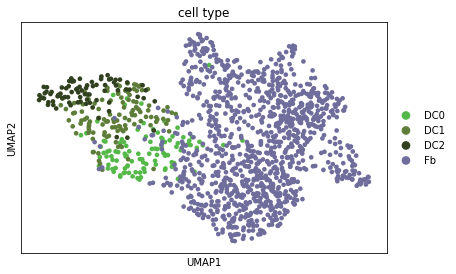

In [89]:
#Visualize which Rendl sort gate a cell comes from
sc.pl.umap(adata, color="cell_type", use_raw=True, edges=False, edges_width=0.1, edges_color='grey', arrows=False, arrows_kwds=None, sort_order=True, alpha=None, groups=None, components=None, projection='2d', legend_loc='right margin', legend_fontsize=None, legend_fontweight=None, color_map=None, palette=None, right_margin=None, size=None, title=None, show=False, save=None, ax=None)
plt.savefig("/Users/tija/Documents/RendlCollaboration/Final/UMAP_CellSort.svg")

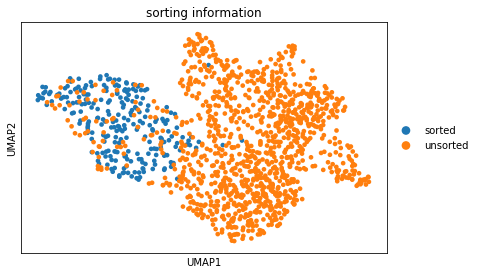

In [90]:
#Visualize if cells are from enriched plates or randomly sorted plates
sc.pl.umap(adata, color="sorting_information", use_raw=True, edges=False, edges_width=0.1, edges_color='grey', arrows=False, arrows_kwds=None, sort_order=True, alpha=None, groups=None, components=None, projection='2d', legend_loc='right margin', legend_fontsize=None, legend_fontweight=None, color_map=None, palette=None, right_margin=None, size=None, title=None, show=None, save=None, ax=None)

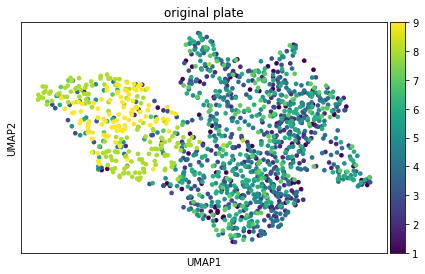

In [91]:
#Visualize which original plate a cell comes from
sc.pl.umap(adata, color="original_plate", use_raw=True, edges=False, edges_width=0.1, edges_color='grey', arrows=False, arrows_kwds=None, sort_order=True, alpha=None, groups=None, components=None, projection='2d', legend_loc='right margin', legend_fontsize=None, legend_fontweight=None, color_map=None, palette=None, right_margin=None, size=None, title=None, show=None, save=None, ax=None)

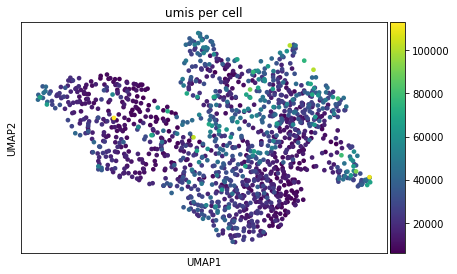

In [92]:
#Visualize number of transcripts per cell
sc.pl.umap(adata, color="umis_per_cell", use_raw=True, edges=False, edges_width=0.1, edges_color='grey', arrows=False, arrows_kwds=None, sort_order=True, alpha=None, groups=None, components=None, projection='2d', legend_loc='right margin', legend_fontsize=None, legend_fontweight=None, color_map=None, palette=None, right_margin=None, size=None, title=None, show=None, save=None, ax=None)

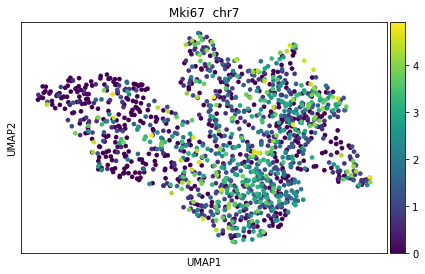

In [93]:
#Visualize expression of Ki67, a known marker for proliferation/cell cycle
sc.pl.umap(adata, color="Mki67__chr7", use_raw=True, edges=False, edges_width=0.1, edges_color='grey', arrows=False, arrows_kwds=None, sort_order=True, alpha=None, groups=None, components=None, projection='2d', legend_loc='right margin', legend_fontsize=None, legend_fontweight=None, color_map=None, palette=None, right_margin=None, size=None, title=None, show=None, save=None, ax=None)

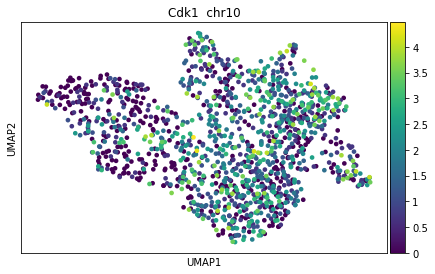

In [94]:
#Visualize expression of Cdk1, a known marker for proliferation/cell cycle
sc.pl.umap(adata, color="Cdk1__chr10", use_raw=True, edges=False, edges_width=0.1, edges_color='grey', arrows=False, arrows_kwds=None, sort_order=True, alpha=None, groups=None, components=None, projection='2d', legend_loc='right margin', legend_fontsize=None, legend_fontweight=None, color_map=None, palette=None, right_margin=None, size=None, title=None, show=None, save=None, ax=None)

In [95]:
sc.tl.diffmap(adata_diffmap, n_comps=15, copy=False)

... storing 'cell_type' as categorical
... storing 'sorting_information' as categorical


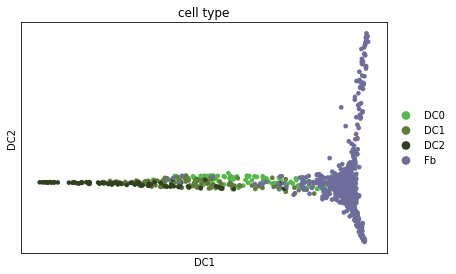

In [96]:
#Visualize which Rendl sort gate a cell comes from
sc.pl.diffmap(adata_diffmap, color="cell_type", use_raw=True, sort_order=True, alpha=None, groups=None, components=None, projection='2d', legend_loc='right margin', legend_fontsize=None, legend_fontweight=None, color_map=None, palette=None, right_margin=None, size=None, title=None, show=None, save=None, ax=None)

### Cluster cells (Blondel 2008, Levine 2015 - Louvain)

In [97]:
sc.tl.louvain(adata_diffmap,resolution=1)

In [98]:
#Change color scheme to a scheme suitable for colorblind people
#Based on http://www.somersault1824.com/tips-for-designing-scientific-figures-for-color-blind-readers/
#Tested in http://www.color-blindness.com/coblis-color-blindness-simulator/
adata.uns['louvain_colors']=['#dbd100', '#000000', '#006ddb', '#b6dbff', '#920000', '#a0a0a0', '#ffff6d']
adata_diffmap.uns['louvain_colors']=['#dbd100', '#000000', '#006ddb', '#b6dbff', '#920000', '#a0a0a0', '#ffff6d']

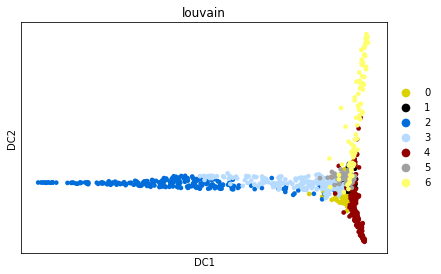

In [99]:
#Visualize which Louvain cluster a cell was assigned to
sc.pl.diffmap(adata_diffmap, color="louvain", use_raw=True, sort_order=True, alpha=None, groups=None, components=None, projection='2d', legend_loc='right margin', legend_fontsize=None, legend_fontweight=None, color_map=None, palette=None, right_margin=None, size=None, title=None, show=None, save=None, ax=None)

In [100]:
sc.tl.louvain(adata,resolution=1)

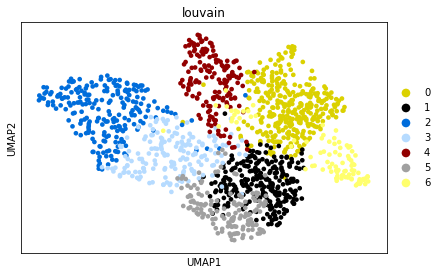

In [101]:
#Visualize which Louvain cluster a cell was assigned to
sc.pl.umap(adata, color="louvain", use_raw=True, edges=False, edges_width=0.1, edges_color='grey', arrows=False, arrows_kwds=None, sort_order=True, alpha=None, groups=None, components=None, projection='2d', legend_loc='right margin', legend_fontsize=None, legend_fontweight=None, color_map=None, palette=None, right_margin=None, size=None, title=None, show=False, save=None, ax=None)
plt.savefig("/Users/tija/Documents/RendlCollaboration/Final/UMAP_Louvain.svg")

In [102]:
adata.obs[0:10]     #Meta-data table with louvain clusters (only first 10 cells are shown)

,cell_type,sorting_information,original_plate,umis_per_cell,cluster_raceID3,n_genes,louvain
well_id,,,,,,,
KM01_02,Fb,unsorted,1,22954.90,1,5366,1
KM01_05,Fb,unsorted,1,31514.88,1,6236,1
KM01_06,Fb,unsorted,1,90628.79,2,8307,0
KM01_14,DC1,unsorted,1,12038.07,3,4037,2
KM01_16,Fb,unsorted,1,60681.25,1,7693,1
KM01_17,Fb,unsorted,1,51475.90,2,7208,0
KM01_19,Fb,unsorted,1,34209.46,1,6204,0
KM01_24,Fb,unsorted,1,13725.97,4,3576,1
KM01_27,Fb,unsorted,1,12979.43,4,4257,1


In [103]:
type(adata.obs["louvain"][2])

numpy.str_

In [104]:
type(adata.obs["cluster_raceID3"][2])

numpy.int64

In [105]:
#Make cluster_raceID3 column strings, so they are not displayed with a continuous scale
adata.obs["cluster_raceID3"]=adata.obs["cluster_raceID3"].astype('str')
type(adata.obs["cluster_raceID3"][2])

str

... storing 'cluster_raceID3' as categorical


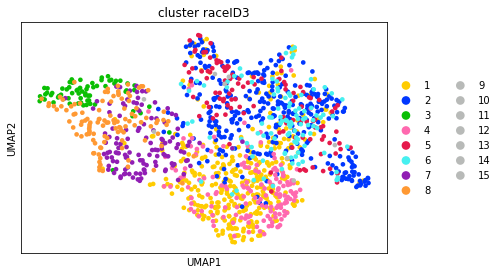

In [106]:
#Visualize which RaceID3 cluster a cell was assigned to
sc.pl.umap(adata, color="cluster_raceID3", use_raw=True, edges=False, edges_width=0.1, edges_color='grey', arrows=False, arrows_kwds=None, sort_order=True, alpha=None, groups=None, components=None, projection='2d', legend_loc='right margin', legend_fontsize=None, legend_fontweight=None, color_map=None, palette=None, right_margin=None, size=None, title=None, show=False, save=None, ax=None)
plt.savefig("/Users/tija/Documents/RendlCollaboration/Final/UMAP_RaceID3.svg")

### Find genes linked to louvain clusters

In [107]:
sc.tl.rank_genes_groups(adata, groupby='louvain', use_raw=True, groups='all', reference='rest', n_genes=100, only_positive=True, key_added=None, copy=False, method='t-test_overestim_var')

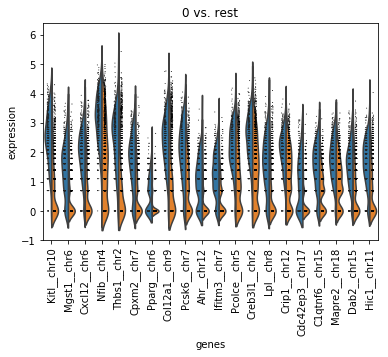

In [108]:
#Plot top 20 genes for cluster 0
sc.pl.rank_genes_groups_violin(adata)

In [109]:
adata.uns["rank_genes_groups"]

{'params': {'groupby': 'louvain',
  'reference': 'rest',
  'method': 't-test_overestim_var',
  'use_raw': True},
 'scores': rec.array([(20.517204 , 12.108088 , 25.972933 , 9.695603 , 29.015947 , 16.396952 , 19.110058 ),
            (16.000889 , 11.537406 , 25.149515 , 9.56295  , 21.218695 , 14.295651 , 18.546225 ),
            (15.904396 , 10.251237 , 23.768463 , 9.3543415, 20.787685 , 13.416498 , 18.05755  ),
            (15.542797 ,  9.037213 , 23.320147 , 9.06907  , 19.583345 , 12.761602 , 15.6955595),
            (14.124861 ,  7.9619136, 22.193033 , 8.89153  , 18.52896  , 11.740932 , 15.550798 ),
            (14.099471 ,  7.8341827, 22.042719 , 8.270323 , 18.007566 , 11.376513 , 15.361941 ),
            (13.713314 ,  7.5484095, 21.713598 , 8.184488 , 17.238441 , 11.275949 , 15.235867 ),
            (13.332329 ,  7.3750854, 20.80885  , 8.127959 , 16.696806 , 11.109957 , 14.785056 ),
            (13.151544 ,  7.14342  , 20.255505 , 7.723153 , 16.520569 , 11.087878 , 14.604321 ),
    

### Compare cluster assignment with louvain and raceID3

In [110]:
#function to compare how well clusters from one dataset overlap with clusters from another dataset
def clusteringA_vs_clusteringB(A, B):
    
    #define output
    
    output = pd.DataFrame(index = np.unique(B), columns = np.unique(A))
    
    for col in np.unique(A):
        names_A=np.array(A.index)
        filter_col=np.array([True if x==col else False for x in A["cluster"]])
        ix_col = names_A[filter_col]
        
        for row in np.unique(B):
            names_B=np.array(B.index)
            filter_row=np.array([True if x==row else False for x in B["cluster"]])
            ix_row = names_B[filter_row]
            
            output.loc[row, col] = float(len(list(set(ix_row) & set(ix_col)))) / float(len(ix_row))
    
    return output

In [111]:
clustering_louvain=adata.obs['louvain']
clustering_louvain[0:10]    #Display Louvain cluster assignment (only first 10 cells are shown)

well_id
KM01_02    1
KM01_05    1
KM01_06    0
KM01_14    2
KM01_16    1
KM01_17    0
KM01_19    0
KM01_24    1
KM01_27    1
KM01_32    0
Name: louvain, dtype: category
Categories (7, object): [0, 1, 2, 3, 4, 5, 6]

In [112]:
clustering_raceID3=adata.obs['cluster_raceID3']
clustering_raceID3[0:10]   #Display RaceID3 cluster assignment from Rendl lab (only first 10 cells are shown)

well_id
KM01_02    1
KM01_05    1
KM01_06    2
KM01_14    3
KM01_16    1
KM01_17    2
KM01_19    1
KM01_24    4
KM01_27    4
KM01_32    2
Name: cluster_raceID3, dtype: category
Categories (15, object): [1, 2, 3, 4, ..., 12, 13, 14, 15]

In [113]:
clustering_louvain.to_csv(path='/Users/tija/Documents/RendlCollaboration/Final/180828_Clusters_Louvain.csv', index=True, sep='\t', na_rep='', float_format=None, header=False, index_label=None, mode='w', encoding=None, date_format=None, decimal='.')
clustering_raceID3.to_csv(path='/Users/tija/Documents/RendlCollaboration/Final/180828_Clusters_RaceID3.csv', index=True, sep='\t', na_rep='', float_format=None, header=False, index_label=None, mode='w', encoding=None, date_format=None, decimal='.')

In [114]:
clustering_louvain = pd.read_csv('/Users/tija/Documents/RendlCollaboration/Final/180828_Clusters_Louvain.csv', sep='\t',index_col=0,names=['cell','cluster'])
clustering_raceID3 = pd.read_csv('/Users/tija/Documents/RendlCollaboration/Final/180828_Clusters_RaceID3.csv', sep='\t',index_col=0,names=['cell','cluster'])

In [115]:
raceID3_vs_louvain=clusteringA_vs_clusteringB(clustering_raceID3,clustering_louvain)
louvain_vs_raceID3=clusteringA_vs_clusteringB(clustering_louvain,clustering_raceID3)

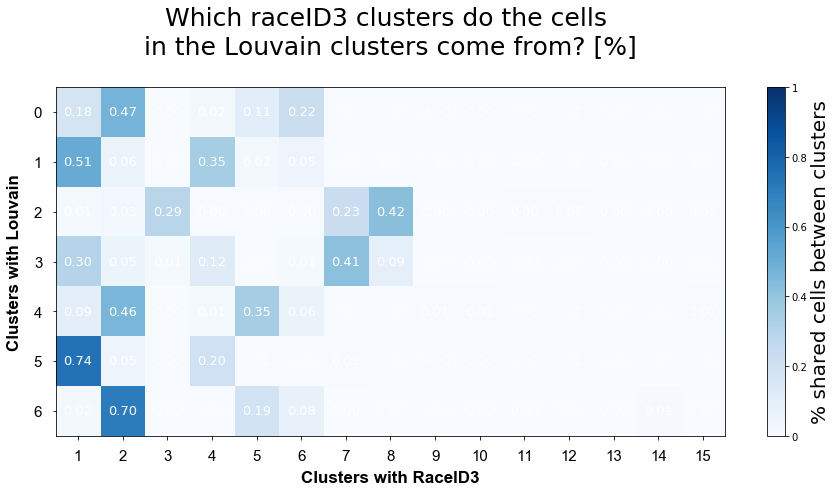

In [116]:
## Plot how well clustering using Louvain and clustering using RaceID3 agree

data = raceID3_vs_louvain

#generate figure

fig = plt.figure(facecolor = 'w', figsize = (len(data.columns), len(data.index)))
gs = plt.GridSpec(nrows = 2, ncols = 1, wspace=0.0, hspace=0.0, height_ratios=[1.0, 11.0])

#generate plot

ax = plt.subplot(gs[1])

#generate xaxis

ax.set_xlim(-0.5, len(data.columns) - 0.5)
ax.set_xticks(np.arange(0, len(data.columns)))
ax.set_xticklabels(data.columns,family='Arial',fontsize=15)
ax.set_xlabel('Clusters with RaceID3', family = 'Arial', fontsize = 17, weight='bold')
ax.xaxis.set_label_coords(0.5, -0.1)
ax.tick_params(axis='x', which='major', pad=10)

#generate yaxis

ax.set_ylim(len(data.index) -0.5, -0.5)
ax.set_yticks(np.arange(0, len(data.index)))
ax.set_yticklabels(data.index,family='Arial',fontsize=15)
ax.set_ylabel('Clusters with Louvain', family = 'Arial', fontsize = 17, weight='bold')
ax.yaxis.set_label_coords(-0.05, 0.5)
ax.tick_params(axis='y', which='major', pad=10)

#plot data
img=ax.imshow(data.astype(float),
          cmap = plt.cm.Blues,
          aspect = 'auto',
          interpolation = 'nearest',
          vmin = 0, vmax = 1)

# Loop over data dimensions and create text annotations.
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        text = ax.text(j, i, ("%.2f" % data.iloc[i, j]), ha="center", va="center", color="w",fontsize=13)

#Title
ax.set_title("Which raceID3 clusters do the cells \n in the Louvain clusters come from? [%] \n",fontsize=25)
        
#legend
cbar = plt.colorbar(img, ax=ax)
cbar.ax.set_yticklabels(['0','0.2','0.4','0.6','0.8','1'])
cbar.set_label('% shared cells between clusters', rotation=90, fontsize = 20)

In [117]:
raceID3_vs_louvain

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.175758,0.472727,0,0.0212121,0.109091,0.221212,0,0,0,0,0,0,0,0,0
1,0.511364,0.0606061,0,0.352273,0.0189394,0.0492424,0,0,0,0.00378788,0,0,0.00378788,0,0
2,0.012987,0.025974,0.290043,0.004329,0,0.004329,0.229437,0.424242,0,0,0.004329,0.004329,0,0,0
3,0.301775,0.0532544,0.0118343,0.118343,0,0.0118343,0.414201,0.0887574,0,0,0,0,0,0,0
4,0.0949367,0.462025,0,0.0126582,0.348101,0.0632911,0,0,0.00632911,0.00632911,0,0,0,0,0.00632911
5,0.742857,0.05,0,0.2,0,0,0.00714286,0,0,0,0,0,0,0,0
6,0.021978,0.703297,0,0,0.186813,0.0769231,0,0,0,0,0,0,0,0.010989,0


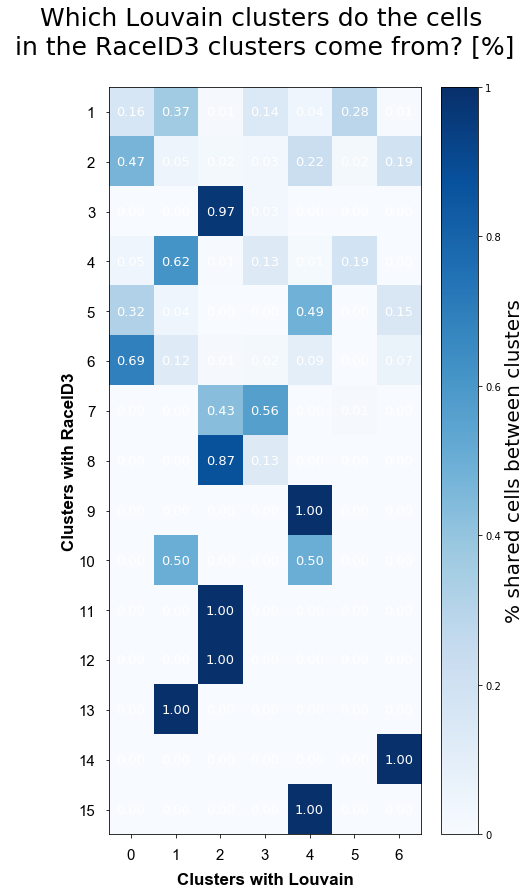

In [118]:
## Plot how well clustering using Louvain and clustering using RaceID3 agree

data = louvain_vs_raceID3

#generate figure

fig = plt.figure(facecolor = 'w', figsize = (len(data.columns), len(data.index)))
gs = plt.GridSpec(nrows = 2, ncols = 1, wspace=0.0, hspace=0.0, height_ratios=[1.0, 11.0])

#generate plot

ax = plt.subplot(gs[1])

#generate xaxis

ax.set_xlim(-0.5, len(data.columns) - 0.5)
ax.set_xticks(np.arange(0, len(data.columns)))
ax.set_xticklabels(data.columns,family='Arial',fontsize=15)
ax.set_xlabel('Clusters with Louvain', family = 'Arial', fontsize = 17, weight='bold')
ax.xaxis.set_label_coords(0.5, -0.05)
ax.tick_params(axis='x', which='major', pad=10)

#generate yaxis

ax.set_ylim(len(data.index) -0.5, -0.5)
ax.set_yticks(np.arange(0, len(data.index)))
ax.set_yticklabels(data.index,family='Arial',fontsize=15)
ax.set_ylabel('Clusters with RaceID3', family = 'Arial', fontsize = 17, weight='bold')
ax.yaxis.set_label_coords(-0.1, 0.5)
ax.tick_params(axis='y', which='major', pad=10)

#plot data
img=ax.imshow(data.astype(float),
          cmap = plt.cm.Blues,
          aspect = 'auto',
          interpolation = 'nearest',
          vmin = 0, vmax = 1)

# Loop over data dimensions and create text annotations.
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        text = ax.text(j, i, ("%.2f" % data.iloc[i, j]), ha="center", va="center", color="w",fontsize=13)

#Title
ax.set_title("Which Louvain clusters do the cells \n in the RaceID3 clusters come from? [%] \n",fontsize=25)

#legend
cbar = plt.colorbar(img, ax=ax)
cbar.ax.set_yticklabels(['0','0.2','0.4','0.6','0.8','1'])
cbar.set_label('% shared cells between clusters', rotation=90, fontsize = 20)

### Subset data to only include louvain clusters 1, 2, 3, and 5 (dermal condensate cells and fibroblasts closest to dermal condensate cells)

In [119]:
subsetting_IDs=list(adata[adata.obs["louvain"] == "1"].obs_names)+list(adata[adata.obs["louvain"] == "2"].obs_names)+list(adata[adata.obs["louvain"] == "3"].obs_names)+list(adata[adata.obs["louvain"] == "5"].obs_names)
len(subsetting_IDs)    #804 cells remain after subsetting

804

In [120]:
adata=adata[subsetting_IDs]

In [121]:
adata.shape

(804, 3133)

In [122]:
adata.obs[0:10]     #Display subsetted data (only first 10 cells displayed)

,cell_type,sorting_information,original_plate,umis_per_cell,cluster_raceID3,n_genes,louvain
well_id,,,,,,,
KM01_02,Fb,unsorted,1,22954.90,1,5366,1
KM01_05,Fb,unsorted,1,31514.88,1,6236,1
KM01_16,Fb,unsorted,1,60681.25,1,7693,1
KM01_24,Fb,unsorted,1,13725.97,4,3576,1
KM01_27,Fb,unsorted,1,12979.43,4,4257,1
KM01_39,Fb,unsorted,1,27404.55,1,5788,1
KM01_75,Fb,unsorted,1,31122.79,1,6081,1
KM01_80,Fb,unsorted,1,31330.50,1,6047,1
KM01_86,Fb,unsorted,1,45900.05,1,6804,1


In [123]:
#Save IDs of cells that are part of subset analysis
with open('/Users/tija/Documents/RendlCollaboration/Final/180828_Cell-Selection-Zoom.csv','w') as outfile:
        for entries in adata.obs_names:
            outfile.write(entries)
            outfile.write("\n")            

### Calculate diffmap for selection

In [124]:
adata_diffmap=sc.pp.neighbors(adata, n_neighbors=15, n_pcs=39, use_rep=None, knn=True, random_state=0, method='gauss', metric='euclidean', metric_kwds={}, copy=True)

/anaconda3/lib/python3.6/site-packages/scanpy/neighbors/__init__.py:123: RuntimeWarning: invalid value encountered in sqrt
  distances = np.sqrt(distances)


In [125]:
#For Scnapy diffusion pseudotime run it with n_comps=15
sc.tl.diffmap(adata_diffmap, n_comps=15, copy=False)

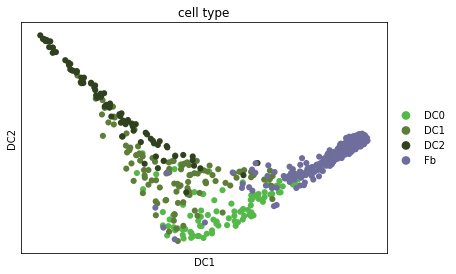

In [126]:
#Visualize which Rendl sort gate a cell comes from
sc.pl.diffmap(adata_diffmap, color="cell_type", use_raw=True, sort_order=True, alpha=None, groups=None, components=None, projection='2d', legend_loc='right margin', legend_fontsize=None, legend_fontweight=None, color_map=None, palette=None, right_margin=None, size=None, title=None, show=False, save=None, ax=None)
plt.savefig("/Users/tija/Documents/RendlCollaboration/Final/DiffMap_Subset_CellSort.svg")

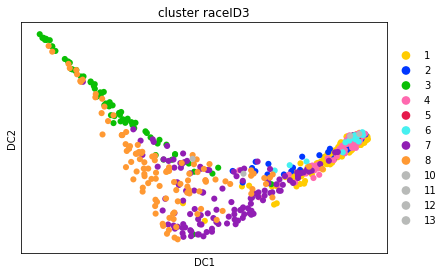

In [127]:
#Visualize which RaceID3 cluster a cell was assigned to
adata_diffmap.uns['cluster_raceID3_colors']=['#FFCC00','#0037FF','#0ABF04','#FF69AF','#E6194B','#46F0F0','#911EB4','#FF9933','#b8bab8','#b8bab8','#b8bab8','#b8bab8','#b8bab8','#b8bab8','#b8bab8']
sc.pl.diffmap(adata_diffmap, color="cluster_raceID3", use_raw=True, sort_order=True, alpha=None, groups=None, components=None, projection='2d', legend_loc='right margin', legend_fontsize=None, legend_fontweight=None, color_map=None, palette=None, right_margin=None, size=None, title=None, show=None, save=None, ax=None)

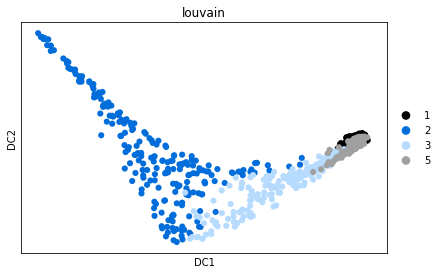

In [128]:
#Visualize which Louvain cluster a cell was assigned to
sc.pl.diffmap(adata_diffmap, color="louvain", use_raw=True, sort_order=True, alpha=None, groups=None, components=None, projection='2d', legend_loc='right margin', legend_fontsize=None, legend_fontweight=None, color_map=None, palette=None, right_margin=None, size=None, title=None, show=None, save=None, ax=None)

### Model differentiation pseudotime (on diffmap and UMAP)

In [129]:
#Find right-most fibroblast as starting point for dpt (Note: X_diffmap contains DC0 as first element even though it's not plotted)
dc_1=[]
for x in np.arange(0,(adata_diffmap.obsm["X_diffmap"].shape[0])):
    dc_1.append(adata_diffmap.obsm["X_diffmap"][x][1])

In [130]:
def search_max_in_list(liste):
    """
    Returns list of indexes where datacolumn == value
    """
    return [x for x in range(len(liste)) if liste[x]==max(liste)]

In [131]:
search_max_in_list(dc_1)     

[15]

In [132]:
adata_diffmap.uns['iroot']=15   #Define root cell for diffusion pseudotime

In [133]:
#Generate column in meta-data table in order to display root cell on diffusion map
adata_diffmap.obs["max.dc1"]=[1 if x==adata_diffmap.obs.index[search_max_in_list(dc_1)] else 0 for x in adata_diffmap.obs.index]

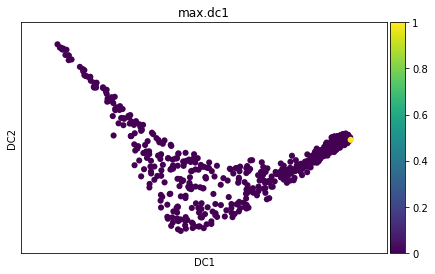

In [134]:
#Root cell displayed on diffusion map
sc.pl.diffmap(adata_diffmap, color="max.dc1", use_raw=True, sort_order=True, alpha=None, groups=None, components=None, projection='2d', legend_loc='right margin', legend_fontsize=None, legend_fontweight=None, color_map=None, palette=None, right_margin=None, size=None, title=None, show=None, save=None, ax=None)

In [135]:
#Calculate diffusion pseudotime
sc.tl.dpt(adata_diffmap,n_branchings=0,n_dcs=10,min_group_size=0.01, allow_kendall_tau_shift=True, copy=False)

In [136]:
adata_diffmap.obs[0:10]    #Meta-data table with results of diffusion pseudotime analysis (dpt_pseudotime represents order of cells from 0 to 1))

,cell_type,sorting_information,original_plate,umis_per_cell,cluster_raceID3,n_genes,louvain,max.dc1,dpt_pseudotime
well_id,,,,,,,,,
KM01_02,Fb,unsorted,1,22954.90,1,5366,1,0,0.166589
KM01_05,Fb,unsorted,1,31514.88,1,6236,1,0,0.057162
KM01_16,Fb,unsorted,1,60681.25,1,7693,1,0,0.040987
KM01_24,Fb,unsorted,1,13725.97,4,3576,1,0,0.155711
KM01_27,Fb,unsorted,1,12979.43,4,4257,1,0,0.133514
KM01_39,Fb,unsorted,1,27404.55,1,5788,1,0,0.065014
KM01_75,Fb,unsorted,1,31122.79,1,6081,1,0,0.122049
KM01_80,Fb,unsorted,1,31330.50,1,6047,1,0,0.164067
KM01_86,Fb,unsorted,1,45900.05,1,6804,1,0,0.127718


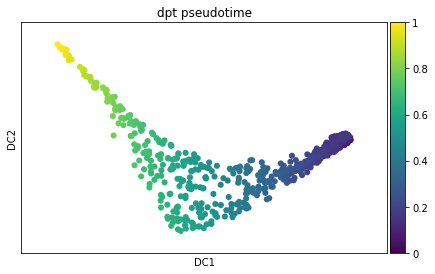

In [137]:
#Diffusion pseudotime visualized on diffusion map (0 = starting point, 1 = end point)
sc.pl.diffmap(adata_diffmap, color="dpt_pseudotime", use_raw=True, sort_order=True, alpha=None, groups=None, components=None, projection='2d', legend_loc='right margin', legend_fontsize=None, legend_fontweight=None, color_map=plt.cm.viridis, palette=None, right_margin=None, size=None, title=None, show=False, save=None, ax=None)
plt.savefig("/Users/tija/Documents/RendlCollaboration/Final/DiffMap_Subset_DiffusionPseudotime.svg")

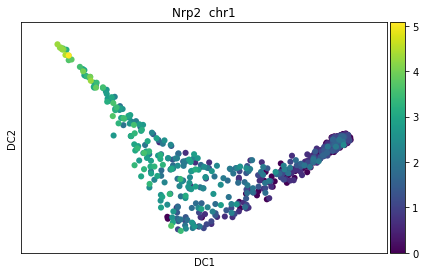

In [138]:
#Visualize expression of Nrp2, a known marker for dermal condensate maturation
sc.pl.diffmap(adata_diffmap, color="Nrp2__chr1", use_raw=True, sort_order=True, alpha=None, groups=None, components=None, projection='2d', legend_loc='right margin', legend_fontsize=None, legend_fontweight=None, color_map=None, palette=None, right_margin=None, size=None, title=None, show=None, save=None, ax=None)

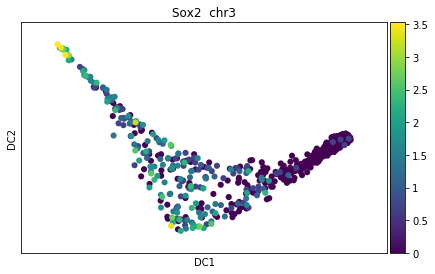

In [139]:
#Visualize expression of Sox2, a known marker for dermal condensate maturation
sc.pl.diffmap(adata_diffmap, color="Sox2__chr3", use_raw=True, sort_order=True, alpha=None, groups=None, components=None, projection='2d', legend_loc='right margin', legend_fontsize=None, legend_fontweight=None, color_map=None, palette=None, right_margin=None, size=None, title=None, show=None, save=None, ax=None)